# Descrição do Projeto

Os clientes do Beta Bank estão saindo: pouco a pouco, escapulindo todo mês. Os banqueiros descobriram que é mais barato manter os clientes existentes do que atrair novos.

Precisamos prever se um cliente vai deixar o banco em breve. Você tem os dados sobre o comportamento passado dos clientes e rescisões de contratos com o banco.

Construa um modelo com o valor máximo possível de F1. Para passar na revisão, você precisa de um F1-score de pelo menos 0,59 para o conjunto de dados de teste. 

Além disso, meça a métrica AUC-ROC e compare-a com o F1-score.

# Dicionario do Projeto

* RowNumber — índice das strings de dados

* CustomerId — identificador exclusivo do cliente

* Surname — sobrenome

* CreditScore — pontuação de crédito

* Geography — país de residência

* Gender — gênero

* Age — idade

* Tenure — período de maturação para o depósito fixo de um cliente (anos)

* Balance — saldo da conta

* NumOfProducts — número de produtos bancários usados pelo cliente

* HasCrCard — cliente possui cartão de crédito (1 - sim; 0 - não)

* IsActiveMember — cliente ativo (1 - sim; 0 - não)

* EstimatedSalary — salário estimado

* Objetivo:    Exited — o cliente saiu (1 - sim; 0 - não)

## Bibliotecas Utilizadas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

## Importando os dados

In [3]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Transformando o cabeçalho do datase tudo em minusculo

In [4]:
#transformando tudo em minusculo para facilitar o trabalho
df.columns = df.columns.str.lower()
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Observando as informações dos dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Observando a estatistica dos dados

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Verificando  dados nulos

In [7]:
df[['rownumber','customerid','creditscore','age','tenure','balance',
    'numofproducts','hascrcard','isactivemember','estimatedsalary','exited']].isna().sum()

rownumber            0
customerid           0
creditscore          0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

### verificação do peso dos dados nulos

In [8]:
df['tenure'].isnull().sum()/len(df['tenure'])

np.float64(0.0909)

Os dados faltantes representam 0,0909% do total do arquivo. Não identifiquei nenhum padrão aparente entre a coluna “Tenure” e os demais dados. Portanto, inicialmente, vou remover os dados faltantes.

#### Retirada do numeros nulo da coluna 'Tenure'

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        9091 non-null   int64  
 1   customerid       9091 non-null   int64  
 2   surname          9091 non-null   object 
 3   creditscore      9091 non-null   int64  
 4   geography        9091 non-null   object 
 5   gender           9091 non-null   object 
 6   age              9091 non-null   int64  
 7   tenure           9091 non-null   float64
 8   balance          9091 non-null   float64
 9   numofproducts    9091 non-null   int64  
 10  hascrcard        9091 non-null   int64  
 11  isactivemember   9091 non-null   int64  
 12  estimatedsalary  9091 non-null   float64
 13  exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


#### Verificando se os nulos foram removidos

In [10]:
df['tenure'].isna().sum()

np.int64(0)

##  Definindo os conjuntos de teste


###  Retirando a coluna Surname que não será utilizada no treinamento

In [11]:
df = df.drop(['surname'], axis =1)

### Utilizando a codificação OHE para variáveis categóricas, assim o modelo pode prever todas a variáveis.

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
# As características são todas as informações sobre os clientes que não possuem quaisquer relações com sua identificação:
# (CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember e EstimatedSalary)
features = df.drop(['rownumber', 'customerid','exited'], axis=1)

###  O resultado que queremos é se o cliente saiu (1) ou permaneceu (0)

In [14]:
target = df['exited']

##  Separando os dados para treino e teste, colocando 80% em teste e o resto em treinamento

In [15]:
features_train, features_test, target_train, target_test = train_test_split(
    features,target , test_size=0.2, random_state=12345)

## Separando os dados para treino e validação, colocando 25% em teste e o resto em validação

In [16]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test , test_size=0.75, random_state=12345)

In [17]:
len(features_train)

7272

In [18]:
len(features_test)

454

In [19]:
len(features_valid)

1365

##  Ajustando a escalabilidade das características para garantir que todas tenham a mesma importância no modelo

In [ ]:
numeric = ['creditscore', 'age' , 'tenure', 'balance', 'numofproducts', 'estimatedsalary'] # são as características que queremos deixar com a mesma importancia

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid[numeric])



## Regressão Logística - sem levar em conta o desequilíbrio de classes


In [21]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train,target_train)

score_train = model.score(features_train, target_train)# calcule a acurácia no conjunto de treinamento
score_test = model.score(features_test, target_test)# calcule a acurácia no conjunto de treinamento
score_valid = model.score(features_valid, target_valid) # calcule a acurácia no conjunto de validação

print("Acurácia do modelo de regressão logística no conjunto de treinamento:", score_train)
print("Acurácia do modelo de regressão logística no conjunto de teste:", score_test)
print("Acurácia do modelo de regressão logística no conjunto de validação:", score_valid)

Acurácia do modelo de regressão logística no conjunto de treinamento: 0.8081683168316832
Acurácia do modelo de regressão logística no conjunto de teste: 0.21585903083700442
Acurácia do modelo de regressão logística no conjunto de validação: 0.8205128205128205


###  Verificando a matriz de confusão para os dados

In [22]:
predicted_valid = model.predict(features_valid)
confusion_matrix(target_valid, predicted_valid)

array([[1064,   30],
       [ 215,   56]])

### Sensibilidade

In [23]:
recall_score(target_valid, predicted_valid)

np.float64(0.2066420664206642)

### Precisão

In [24]:
precision_score(target_valid,predicted_valid)

np.float64(0.6511627906976745)

### F1-score

In [25]:
f1_score(target_valid, predicted_valid)

np.float64(0.3137254901960784)

Embora a precisão do modelo seja relativamente alta, ele apresenta uma sensibilidade inferior, o que impacta negativamente o valor do F1-score. Isso sugere a necessidade de ajustar o equilíbrio entre essas métricas


## Trabalhando o Equilíbrio de Classes


###  Adicionando o argumento class_weight no modelo

In [26]:
model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced')
model.fit(features_train,target_train)

score_train = model.score(features_train, target_train)# calcule a acurácia no conjunto de treinamento
score_test = model.score(features_test, target_test)# calcule a acurácia no conjunto de treinamento
score_valid = model.score(features_valid, target_valid) # calcule a acurácia no conjunto de validação

predicted_valid = model.predict(features_valid)

### Sensibilidade

In [27]:
recall_score(target_valid, predicted_valid)

np.float64(0.7453874538745388)

### Precisão

In [28]:
precision_score(target_valid,predicted_valid)

np.float64(0.4122448979591837)

### F1-score

In [29]:
f1_score(target_valid, predicted_valid)

np.float64(0.5308804204993429)

### Traçando a curva ROC do modelo

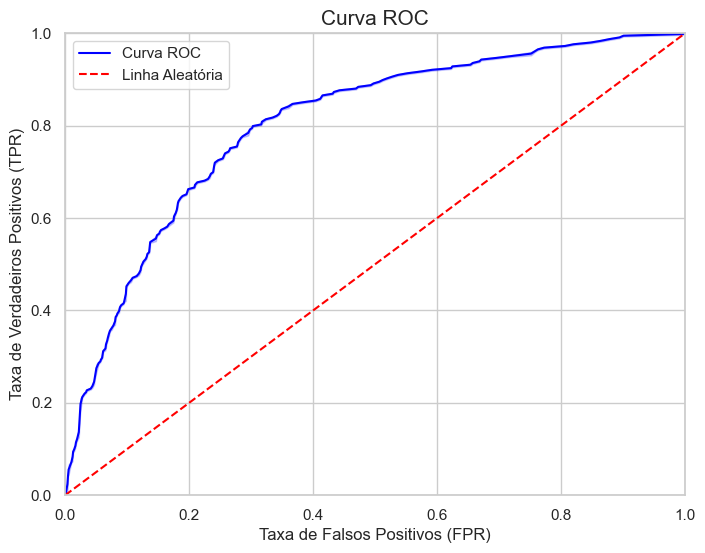

In [30]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

sns.set(style='whitegrid')

# figura e o gráfico com Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, label='Curva ROC', color='blue')
sns.lineplot(x=[0, 1], y=[0, 1], label='Linha Aleatória', linestyle='--', color='red')

# Definir os limites e rótulos dos eixos
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.title('Curva ROC', fontsize=15)

# Exibir o gráfico
plt.legend()
plt.show()

### Traçando a curva ROC do modelo

In [31]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

np.float64(0.8025661609449732)

Após balancearmos as classes e melhorarmos nossos indicadores, vamos agora adotar uma nova abordagem, incorporando a subamostragem

### Subamostragem

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

In [33]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(random_state=54321, solver='liblinear', class_weight='balanced')
model.fit(features_downsampled,target_downsampled)
predicted_valid = model.predict(features_valid)

f1_score(target_valid, predicted_valid)

np.float64(0.524547803617571)

### Traçando a curva ROC do modelo

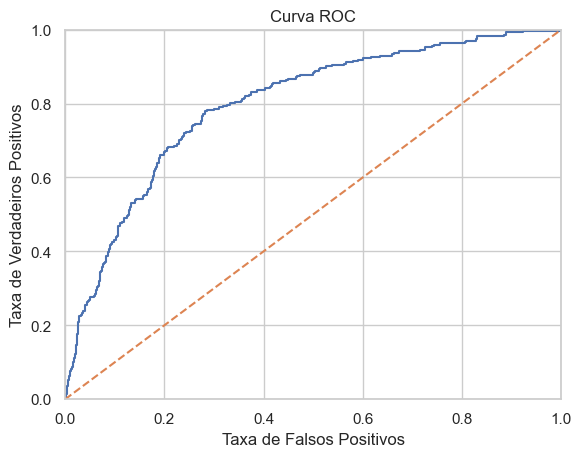

In [34]:

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

### Metrica AUC-ROC

In [35]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

np.float64(0.7968287269709992)

A utilização da subamostragem para corrigir o equilíbrio não foi eficaz, pois resultou na diminuição do valor do F1-score. Portanto, na próxima abordagem, optarei pela superamostragem.

### Superamostragem

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [37]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 20
)

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

f1_score(target_valid, predicted_valid)

np.float64(0.5308804204993429)

### Traçando a curva ROC do modelo

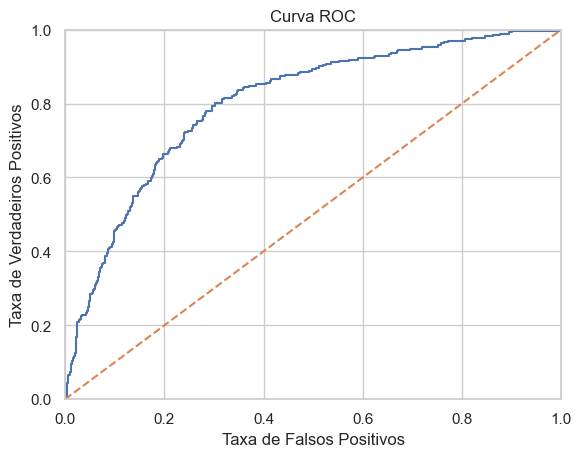

In [38]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

### Metrica  AUC-ROC

In [39]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

np.float64(0.8026066366696574)

## Conclusão

A superamostragem também não foi muito eficaz na melhoria do modelo, pois o valor do F1-score permaneceu inalterado. No entanto, vamos continuar com essa abordagem, já que o resultado é melhor do que o modelo aleatório, embora o AUC-ROC ainda esteja abaixo de 1.

Treinamos nosso modelo e ele apresentou bons resultados nas métricas utilizadas para verificar sua qualidade, como o F1-score e o AUC-ROC. Embora o modelo não atinja o valor máximo em ambas as métricas, seu desempenho é aceitável para ser colocado em uso. Além disso, a Curva ROC indica que ele apresenta resultados superiores ao modelo aleatório.